In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import cumtrapz

In [130]:
def F1_func(t, tauAge, P, tauP, theta, chi, psi0):

    zeta = tauAge * P
    
    psi = 2*np.pi * (1/tauP) * t + psi0

    T1 = -1/(zeta)
    T2 = 3./(zeta*tauAge) * t

    T3 = 1./(zeta) * theta * (2*np.cos(chi)/np.sin(chi) * np.sin(psi)
                              - 0.5*theta*np.cos(2*psi))

    return (T1 + T2 + T3)/(2*np.pi)

def measure_n(tauAge=1e11, P=0.1, tauP=8640000, theta=0.1, chi=0.437, psi0=0, 
              N=100, T=1e8, verbose=False):

    F0_0 = 1/P

    pF0 = 1/P
    pF1 = -1/(tauAge*P)
    pF2 = 3/(tauAge**2 * P)

    time = np.linspace(0, 1*tauP, N)
    F1 = F1_func(time, tauAge, P, tauP, theta, chi, psi0)
    F0 = cumtrapz(y=F1, x=time, initial=0) + F0_0
    P0 = cumtrapz(y=F0, x=time, initial=0)

    coefs, V = np.polyfit(time, P0, deg=3, cov=True)

    mF2 = coefs[0]*6 * (2*np.pi)
    mF1 = coefs[1]*2 * (2*np.pi)
    mF0 = coefs[2]

    errs = np.sqrt(np.diag(V))
    mF2_err = errs[0]*6 * (2*np.pi)
    mF1_err = errs[1]*2 * (2*np.pi)
    mF0_err = errs[2]

    if verbose:
        print "measured F0 = {} +/- {:1.2e} against F0 = {}".format(mF0, mF0_err, pF0)
        print "measured F1 = {:1.2e} +/- {:1.2e} against F1 = {}".format(mF1, mF1_err, pF1)
        print "measured F2 = {:1.2e} +/- {:1.2e} against F2 = {}".format(mF2, mF2_err, pF2)
        print "n = {:1.2f}".format(n)
        
    n = mF0 * mF2 / mF1**2 

    #plt.plot(time, P0 - np.poly1d(coefs)(time), "-")
    #plt.show()
    
    return n

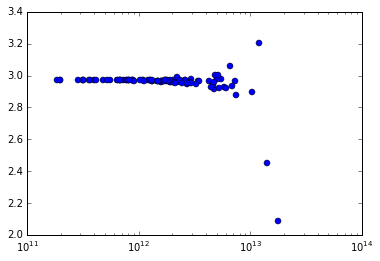

In [131]:
tauAges = np.random.lognormal(28, 1, size=100)
nobs = [measure_n(tauAge=tA) for tA in tauAges]

plt.semilogx(tauAges, nobs, "o")
plt.show()